<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy

In [ ]:
def plotPuntos(a,b):
    T = np.linspace(a, b, 100)
    U = (T*T+T)*np.cos(2*T)+T*T
    return T, U

In [ ]:
def GraficarFuncionObjetivo():
    a, b = 40, 90
    T, U = plotPuntos(a, b)
    
    plt.plot(T, U, 'b')
    plt.plot(55.08, 1225.17, 'ko')
    plt.annotate(r'$55.08, 1225.17$', (55.08, 1225.17), (50, 1250))
    
    plt.xlabel('Temperatura')
    plt.ylabel('Costo')
    plt.grid()
    plt.show()

In [ ]:
def CalcularGradiente():
    T = sympy.Symbol('T')
    U = (T*T+T)*sympy.cos(2*T)+T*T
    
    d1U = sympy.diff(U)
    d2U = sympy.diff(d1U)
    
    print(U)
    print(d1U)
    print(d2U)

In [ ]:
CalcularGradiente()

T**2 + (T**2 + T)*cos(2*T)
2*T + (2*T + 1)*cos(2*T) - 2*(T**2 + T)*sin(2*T)
(-4*T - 2)*sin(2*T) - 2*(2*T + 1)*sin(2*T) + 2*(-2*T**2 - 2*T)*cos(2*T) + 2*cos(2*T) + 2


In [ ]:
def U(T):
    return T**2 + (T**2 + T)*np.cos(2*T)

In [ ]:
def d1U(T):
    return 2*T + (2*T + 1)*np.cos(2*T) - 2*(T**2 + T)*np.sin(2*T)

In [ ]:
def d2U(T):
    return (-4*T - 2)*np.sin(2*T) - 2*(2*T + 1)*np.sin(2*T) + 2*(-2*T**2 - 2*T)*np.cos(2*T) + 2*np.cos(2*T) + 2

In [ ]:
def NewtonRaphson():
    a, b = -5, 5
    x = 5
    epsilon = 0.001
    
    cont = 0
    registro = []
    
    while True:
        # Calculo de f'(x) y f''(x)
        d1U_x = d1U(x)
        d2U_x = d2U(x)
        
        xprev = x
        x = xprev - d1U_x/d2U_x
        
        U_x = U(x)
        
        cont = cont + 1
        registro.append([cont, x, U_x])
        
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
        
        if(np.abs(x - xprev) <= epsilon):
            print("----------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, x, U_x))
            break
        
    return registro

In [ ]:
reg = NewtonRaphson()

It: 01 - Temp: 4.7325955719 - Costo: -4.7104438389
It: 02 - Temp: 4.7216918069 - Costo: -4.7170158617
It: 03 - Temp: 4.7216269988 - Costo: -4.7170160903
----------------------------------------------------------------
It: 03 - Temp: 4.7216269988 - Costo: -4.7170160903


In [ ]:
def evaluacion(reg):
    reg = np.array(reg)
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    
    fig.suptitle('Analisis de convergencia')
    
    axs[0].axhline(55.08, color='k', linewidth=3, linestyle='--')
    axs[0].plot(reg[:, 0], reg[:, 1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])
    
    axs[1].axhline(1225.17, color='k', linewidth=3, linestyle='--')
    axs[1].plot(reg[:, 0], reg[:, 2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])
    
    plt.show()

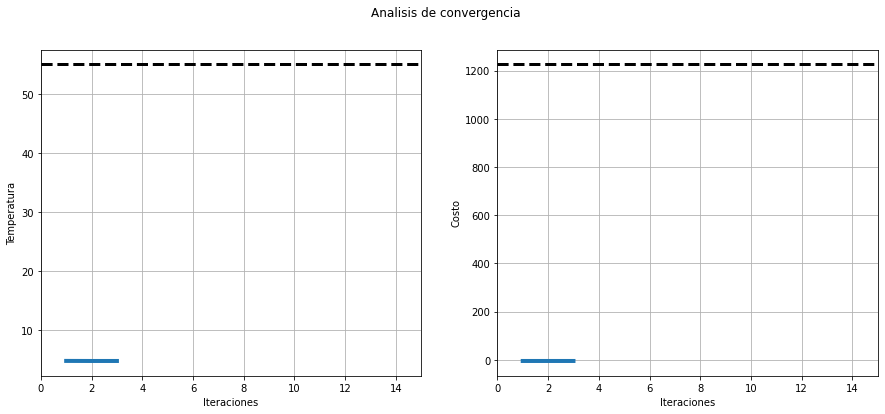

In [ ]:
evaluacion(reg)